In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13288.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/24201.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26556.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26076.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27577.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/27973.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/26452.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/10162.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12768.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/12551.jpg
/kaggle/input/face-expression-recognition-dataset/images/validation/surprise/13205.jpg
/kaggle/input/face-expression-recognition-d

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Preparing Data

In [3]:
train_path = "/kaggle/input/face-expression-recognition-dataset/images/train"
validation_path = "/kaggle/input/face-expression-recognition-dataset/images/validation"

In [4]:
angry_train = os.path.join(train_path,'angry')
disgust_train = os.path.join(train_path,'disgust')
fear_train = os.path.join(train_path,'fear')
happy_train = os.path.join(train_path,'happy')
neutral_train = os.path.join(train_path,'neutral')
sad_train = os.path.join(train_path,'sad')
surprise_train = os.path.join(train_path,'surprise')

In [5]:
print(f"angry training images : {len(os.listdir(angry_train))}")
print(f"disgust training images : {len(os.listdir(disgust_train))}")
print(f"fear training images : {len(os.listdir(fear_train))}")
print(f"happy training images : {len(os.listdir(happy_train))}")
print(f"neutral training images : {len(os.listdir(neutral_train))}")
print(f"sad training images : {len(os.listdir(sad_train))}")
print(f"surprise training images : {len(os.listdir(surprise_train))}")

angry training images : 3993
disgust training images : 436
fear training images : 4103
happy training images : 7164
neutral training images : 4982
sad training images : 4938
surprise training images : 3205


# Displaying Images

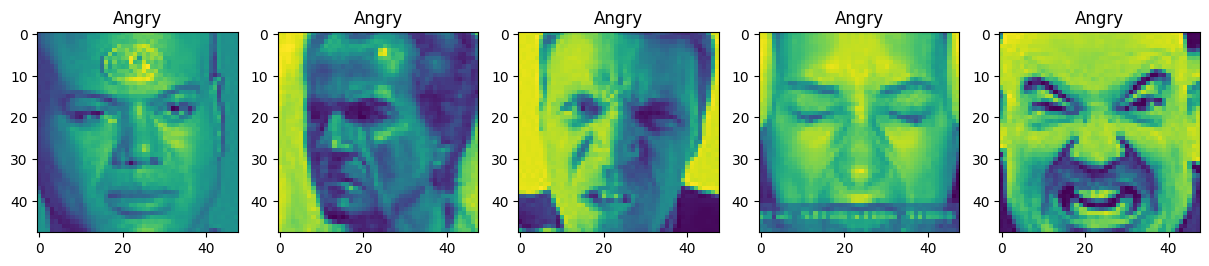

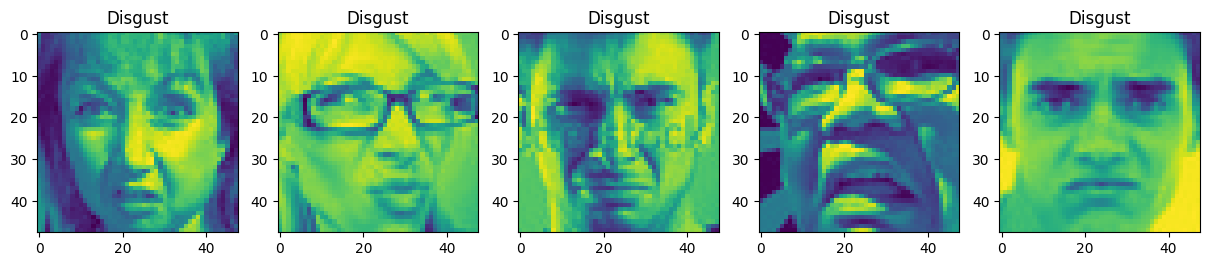

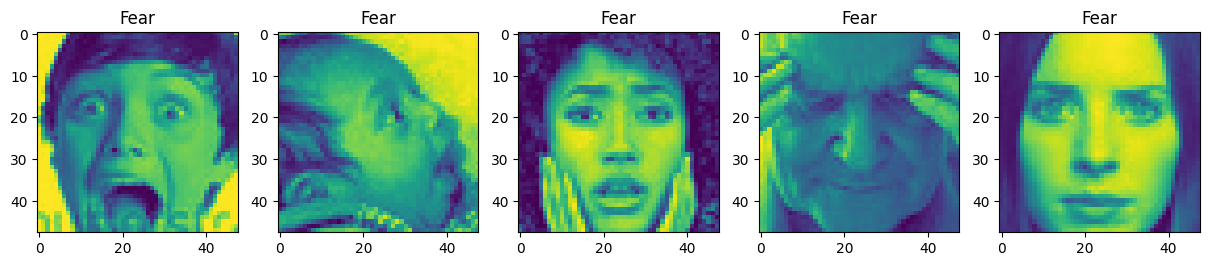

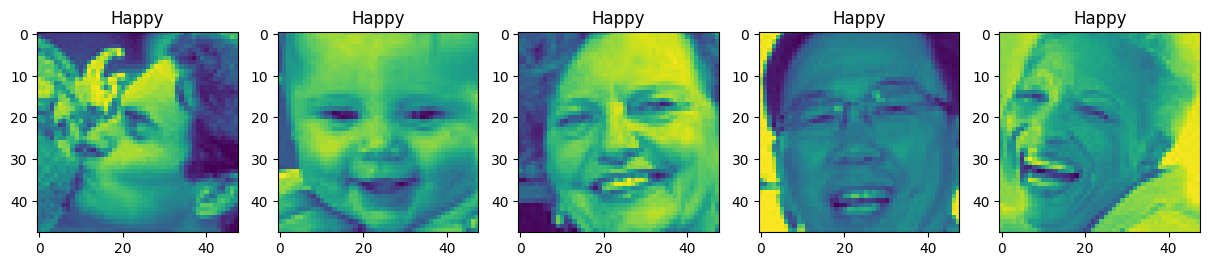

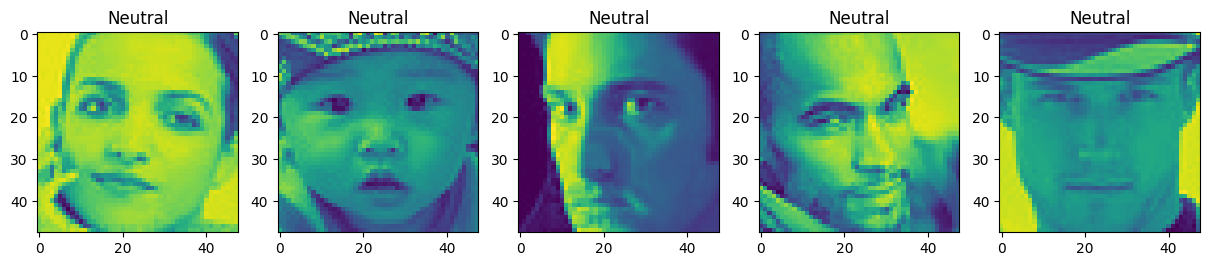

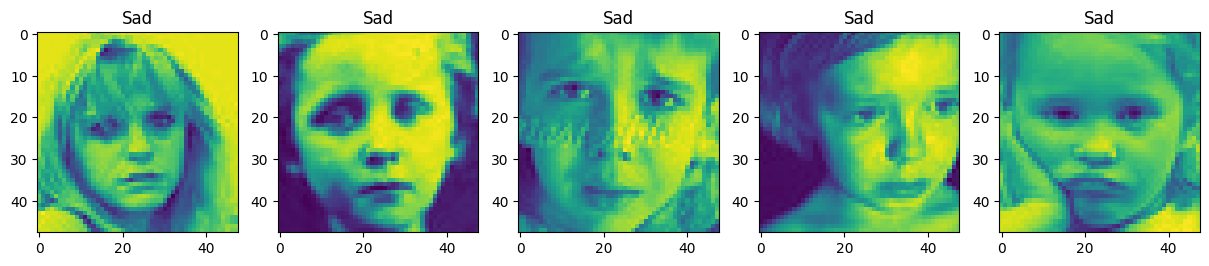

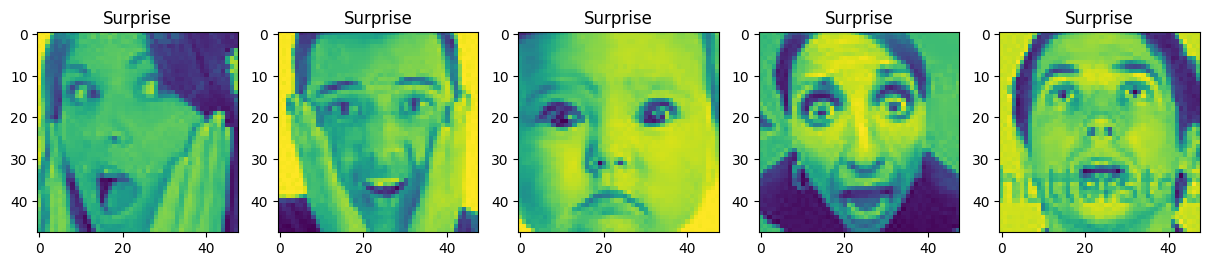

In [6]:
import random

def display_images(folder,label,n=5):
    plt.figure(figsize=(15,3))
    sample_files = random.sample(os.listdir(folder),n)
    for i,img_name in enumerate(sample_files):
        img_path = os.path.join(folder,img_name)
        img = Image.open(img_path)
        plt.subplot(1,n,i+1)
        plt.title(label)
        plt.imshow(img)
    plt.show()
display_images(angry_train,'Angry')
display_images(disgust_train,'Disgust')
display_images(fear_train,'Fear')
display_images(happy_train,'Happy')
display_images(neutral_train,'Neutral')
display_images(sad_train,'Sad')
display_images(surprise_train,'Surprise')  

# Data Preprocessing for CNN Model

In [7]:
IMAGE_SIZE = (48, 48)
BATCH_SIZE = 64
COLOR_MODE = "grayscale"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    rescale=1./255
)

2026-01-05 12:00:49.715883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767614449.882158      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767614449.928930      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767614450.308592      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767614450.308640      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767614450.308642      55 computation_placer.cc:177] computation placer alr

In [9]:
train_data = train_gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    color_mode=COLOR_MODE,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Implementing CNN Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Activation, Dropout, Dense, GlobalAveragePooling2D


In [11]:
num_classes = 7

model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Block 4
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# Head
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

I0000 00:00:1767614467.328280      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,030,151 (3.93 MB)

 Trainable params: 1,028,743 (3.92 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping and Learning Rate Scheduler

**ReduceLROnPlateau** is used for reducing the *Learning rate* automatically when the model stops improving, allowing more finer and stable learning

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=4,
    min_lr=1e-6
)

In [14]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/50


I0000 00:00:1767614473.619022     145 service.cc:152] XLA service 0x7ee8a4014720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1767614473.619063     145 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1767614474.389769     145 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/451 ━━━━━━━━━━━━━━━━━━━━ 1:25:45 11s/step - accuracy: 0.1406 - loss: 2.5437

I0000 00:00:1767614481.244725     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


451/451 ━━━━━━━━━━━━━━━━━━━━ 304s 651ms/step - accuracy: 0.2185 - loss: 1.9322 - val_accuracy: 0.2579 - val_loss: 1.8683 - learning_rate: 1.0000e-04
Epoch 2/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 47s 105ms/step - accuracy: 0.2562 - loss: 1.7882 - val_accuracy: 0.2757 - val_loss: 1.7348 - learning_rate: 1.0000e-04
Epoch 3/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.2715 - loss: 1.7669 - val_accuracy: 0.2645 - val_loss: 1.8648 - learning_rate: 1.0000e-04
Epoch 4/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.2963 - loss: 1.7284 - val_accuracy: 0.2658 - val_loss: 1.8914 - learning_rate: 1.0000e-04
Epoch 5/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.3169 - loss: 1.6909 - val_accuracy: 0.2860 - val_loss: 1.8657 - learning_rate: 1.0000e-04
Epoch 6/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.3387 - loss: 1.6574 - val_accuracy: 0.3245 - val_loss: 1.7737 - learning_rate: 1.0000e-04
Epoch 7/50
451/451 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accu

# Classification Report of CNN Model

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_data.reset()

y_pred_probs = model.predict(val_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_data.classes

class_names = list(val_data.class_indices.keys())

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step


In [16]:
print("Classification Report:\n")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    digits=4
))

Classification Report:

              precision    recall  f1-score   support

       angry     0.3782    0.4771    0.4219       960
     disgust     0.0000    0.0000    0.0000       111
        fear     0.3573    0.1660    0.2267      1018
       happy     0.6967    0.8093    0.7488      1825
     neutral     0.4778    0.5493    0.5111      1216
         sad     0.4508    0.3336    0.3835      1139
    surprise     0.5788    0.7415    0.6502       797

    accuracy                         0.5297      7066
   macro avg     0.4199    0.4396    0.4203      7066
weighted avg     0.5030    0.5297    0.5065      7066



# Data Preprocessing for Transfer Learning

In [17]:
image_size = (224, 224)
input_shape = (224, 224, 3)

In [18]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',   
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    validation_path,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Implementing EfficientNetB0

In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [20]:
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(7, activation='softmax')(x)

model = Model(base_model.input, output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [21]:
model.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#model.summary()

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    min_lr=1e-6
)

In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 336s 175ms/step - accuracy: 0.2300 - loss: 1.8622 - val_accuracy: 0.3249 - val_loss: 1.6939 - learning_rate: 1.0000e-04
Epoch 2/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 288s 160ms/step - accuracy: 0.3237 - loss: 1.6972 - val_accuracy: 0.3695 - val_loss: 1.6365 - learning_rate: 1.0000e-04
Epoch 3/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 292s 162ms/step - accuracy: 0.3476 - loss: 1.6418 - val_accuracy: 0.3939 - val_loss: 1.6091 - learning_rate: 1.0000e-04
Epoch 4/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 292s 162ms/step - accuracy: 0.3607 - loss: 1.6202 - val_accuracy: 0.3970 - val_loss: 1.5871 - learning_rate: 1.0000e-04
Epoch 5/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 288s 160ms/step - accuracy: 0.3784 - loss: 1.5878 - val_accuracy: 0.4033 - val_loss: 1.5725 - learning_rate: 1.0000e-04
Epoch 6/30
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 289s 161ms/step - accuracy: 0.3787 - loss: 1.5824 - val_accuracy: 0.3964 - val_loss: 1.5692 - learning_rate: 1.0000e-04
Epoch 7/30
1802/1802 ━━━━━━━

In [24]:
val_data.reset()

y_pred_probs2 = model.predict(val_data)
y_pred2 = np.argmax(y_pred_probs2, axis=1)
y_true2 = val_data.classes

class_names2 = list(val_data.class_indices.keys())

442/442 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step


# EfficientNetB0 Classification Report

In [25]:
print("EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true2,
    y_pred2,
    target_names=class_names2,
    digits=4
))

EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.3706    0.1656    0.2289       960
     disgust     1.0000    0.0090    0.0179       111
        fear     0.3869    0.1159    0.1784      1018
       happy     0.4874    0.7079    0.5773      1825
     neutral     0.4178    0.3824    0.3993      1216
         sad     0.3064    0.5294    0.3882      1139
    surprise     0.6294    0.4730    0.5401       797

    accuracy                         0.4267      7066
   macro avg     0.5141    0.3405    0.3329      7066
weighted avg     0.4400    0.4267    0.3984      7066



# Fine-Tunning the EfficientNetB0

Handling **class imbalance** 
A model can get high accuracy by predicting only the majority class. In Facial Expression Recognition class imbalance handling is crucial because expression like disgust and fear which has minor differnces can stop the model from getting it's optimal performance.


***compute_class_weight*** computes weights for each class and higher sample class will get low value and lower sample class will get high value.



In [28]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weights = dict(enumerate(class_weights))

In [29]:
import tensorflow as tf

base_model.trainable = True

# Freeze BN layers
for layer in base_model.layers:
    if isinstance(layer,tf.keras.layers.BatchNormalization):
        layer.trainable = False

# Unfreezing the last 30 Layers, these layers learn task-specific features
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(5e-6),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weights
)


Epoch 1/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 391s 193ms/step - accuracy: 0.4259 - loss: 1.5851 - val_accuracy: 0.4960 - val_loss: 1.4864 - learning_rate: 5.0000e-06
Epoch 2/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 300s 166ms/step - accuracy: 0.4554 - loss: 1.5223 - val_accuracy: 0.5232 - val_loss: 1.4298 - learning_rate: 5.0000e-06
Epoch 3/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 297s 165ms/step - accuracy: 0.4789 - loss: 1.4933 - val_accuracy: 0.5369 - val_loss: 1.3966 - learning_rate: 5.0000e-06
Epoch 4/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 297s 165ms/step - accuracy: 0.4931 - loss: 1.4724 - val_accuracy: 0.5542 - val_loss: 1.3737 - learning_rate: 5.0000e-06
Epoch 5/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 297s 165ms/step - accuracy: 0.5004 - loss: 1.4385 - val_accuracy: 0.5590 - val_loss: 1.3585 - learning_rate: 5.0000e-06
Epoch 6/20
1802/1802 ━━━━━━━━━━━━━━━━━━━━ 301s 167ms/step - accuracy: 0.5220 - loss: 1.3902 - val_accuracy: 0.5682 - val_loss: 1.3379 - learning_rate: 5.0000e-06
Epoch 7/20
1802/1802 ━━━━━━━

# Fine-tuned EfficientNetB0 Classification Report

In [31]:
val_data.reset()

fine_y_pred_probs = model.predict(val_data)
y_pred_fine = np.argmax(fine_y_pred_probs, axis=1)
y_true_fine = val_data.classes

class_names = list(val_data.class_indices.keys())

print("Fine-Tuned EfficientNetB0 Classification Report:\n")
print(classification_report(
    y_true_fine,
    y_pred_fine,
    target_names=class_names,
    digits=4
))

442/442 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step
Fine-Tuned EfficientNetB0 Classification Report:

              precision    recall  f1-score   support

       angry     0.5283    0.6021    0.5628       960
     disgust     0.3889    0.7568    0.5138       111
        fear     0.5161    0.2996    0.3791      1018
       happy     0.8919    0.8225    0.8558      1825
     neutral     0.5795    0.6266    0.6021      1216
         sad     0.5124    0.4899    0.5009      1139
    surprise     0.6289    0.8507    0.7232       797

    accuracy                         0.6320      7066
   macro avg     0.5780    0.6355    0.5911      7066
weighted avg     0.6358    0.6320    0.6261      7066

